<a href="https://colab.research.google.com/github/mfiddin/Pemrograman_Python/blob/main/Muhammad%20Faqihna%20Fiddin_1101208513_tugas11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

3scene/  dataset@  nnmodel_scene/  Untitled0.ipynb  Untitled1.ipynb


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [9]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [10]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [11]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [12]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [13]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [14]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [30]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Convolution2D(16, (5,5), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Convolution2D(32, (5,5), activation='relu'))
model.add(MaxPool2D(2,2))
# fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 60, 60, 16)        1216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [31]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 2s 147ms/step - loss: 1.6499 - accuracy: 0.2511 - val_loss: 1.5874 - val_accuracy: 0.2397
Epoch 2/25
14/14 [==============================] - 2s 139ms/step - loss: 1.5166 - accuracy: 0.3402 - val_loss: 1.4889 - val_accuracy: 0.2877
Epoch 3/25
14/14 [==============================] - 2s 141ms/step - loss: 1.3147 - accuracy: 0.4087 - val_loss: 1.1836 - val_accuracy: 0.5411
Epoch 4/25
14/14 [==============================] - 2s 139ms/step - loss: 1.0951 - accuracy: 0.5525 - val_loss: 1.1015 - val_accuracy: 0.5342
Epoch 5/25
14/14 [==============================] - 2s 139ms/step - loss: 0.9340 - accuracy: 0.6324 - val_loss: 1.0630 - val_accuracy: 0.5685
Epoch 6/25
14/14 [==============================] - 2s 139ms/step - loss: 0.7749 - accuracy: 0.6849 - val_loss: 0.8920 - val_accuracy: 0.6781
Epoch 7/25
14/14 [==============================] - 2s 139ms/step - loss: 0.6661 - accuracy: 0.7329 - val_loss: 0.8911 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


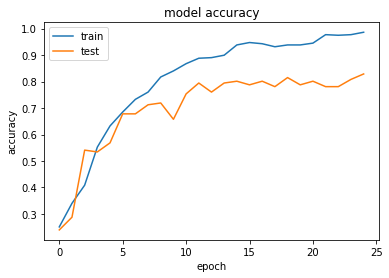

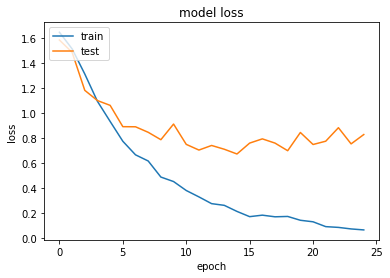

In [32]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.82      0.74      0.78        31
      GMB_02       0.72      0.72      0.72        25
      GMB_03       0.81      0.87      0.84        30
      GMB_04       0.86      0.79      0.83        24
      GMB_05       0.90      0.97      0.93        36

    accuracy                           0.83       146
   macro avg       0.82      0.82      0.82       146
weighted avg       0.83      0.83      0.83       146



In [34]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [37]:
import cv2
import matplotlib.pyplot as plt
image1='dataset/GMB_01/IMG_20200815_201436_HDR.jpg'

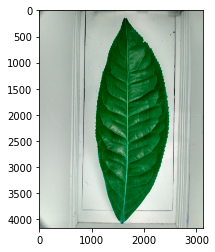

In [38]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [39]:
image_testing = Image.open('dataset/GMB_01/IMG_20200814_132017_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [40]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [41]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.7304664e-01 7.8079574e-05 3.0362156e-07 7.2552538e-01 1.3496147e-03]]
['GMB_04']
